# Task 2: Filtering

**Team member**:  

            BEHIDJ Ramzi
            Ousmane CISSE M2 Track AI
    

# I. Image Filtering


#### SETUP


In [1]:
!wget http://hebergement.universite-paris-saclay.fr/mkowalski/AI/data/barbara.jpg
!wget https://github.com/gpeyre/numerical-tours/raw/master/python/nt_toolbox.zip
!unzip nt_toolbox.zip

--2021-10-01 20:07:42--  http://hebergement.universite-paris-saclay.fr/mkowalski/AI/data/barbara.jpg
Resolving hebergement.universite-paris-saclay.fr (hebergement.universite-paris-saclay.fr)... 129.175.38.38
Connecting to hebergement.universite-paris-saclay.fr (hebergement.universite-paris-saclay.fr)|129.175.38.38|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49452 (48K) [image/jpeg]
Saving to: ‘barbara.jpg.1’

barbara.jpg.1       100%[===================>]  48.29K  --.-KB/s    in 0.02s   

2021-10-01 20:07:42 (1.93 MB/s) - ‘barbara.jpg.1’ saved [49452/49452]

--2021-10-01 20:07:42--  https://github.com/gpeyre/numerical-tours/raw/master/python/nt_toolbox.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gpeyre/numerical-tours/master/python/nt_toolbox.zip [following]
--2021-10-01 20:07:43--  htt

In [2]:
#Importation of libraries
import numpy as np
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow 
import cv2
import scipy as sc
import scipy.ndimage as ndimage
import skimage.exposure as exposure
import math
from skimage.color import rgb2gray
from skimage import filters
from nt_toolbox.general import *
from nt_toolbox.signal import *

## I.1 Gradient filter

In [3]:
n=256*2
s = np.hstack(([n-1],np.arange(0,n-1)))
nabla = lambda f: np.concatenate(((f - f[s,:])[:,:,np.newaxis], (f - f[:,s])[:,:,np.newaxis]), axis=2)

In [4]:
f0 = load_image("barbara.jpg",n)
v = nabla(f0)

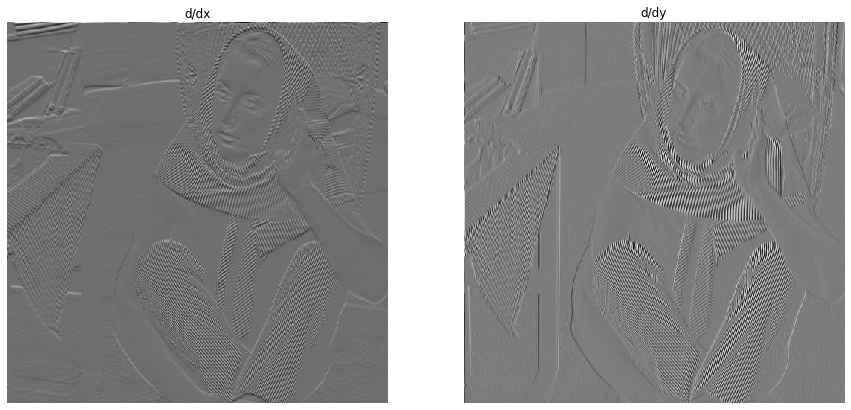

In [5]:
plt.figure(figsize=(15,15))
imageplot(v[:,:,0], "d/dx", [1,2,1])
imageplot(v[:,:,1], "d/dy", [1,2,2])

We notice that the edges are represented by the white pixels

## I.2 Sobel filter

Sobel filter, is a gradient-based method that looks for strong changes in the first derivative of an image.

The Sobel edge detector uses a pair of 3 × 3 convolution masks, one estimating the gradient in the x-direction and the other in the y-direction. 

<Figure size 432x288 with 0 Axes>

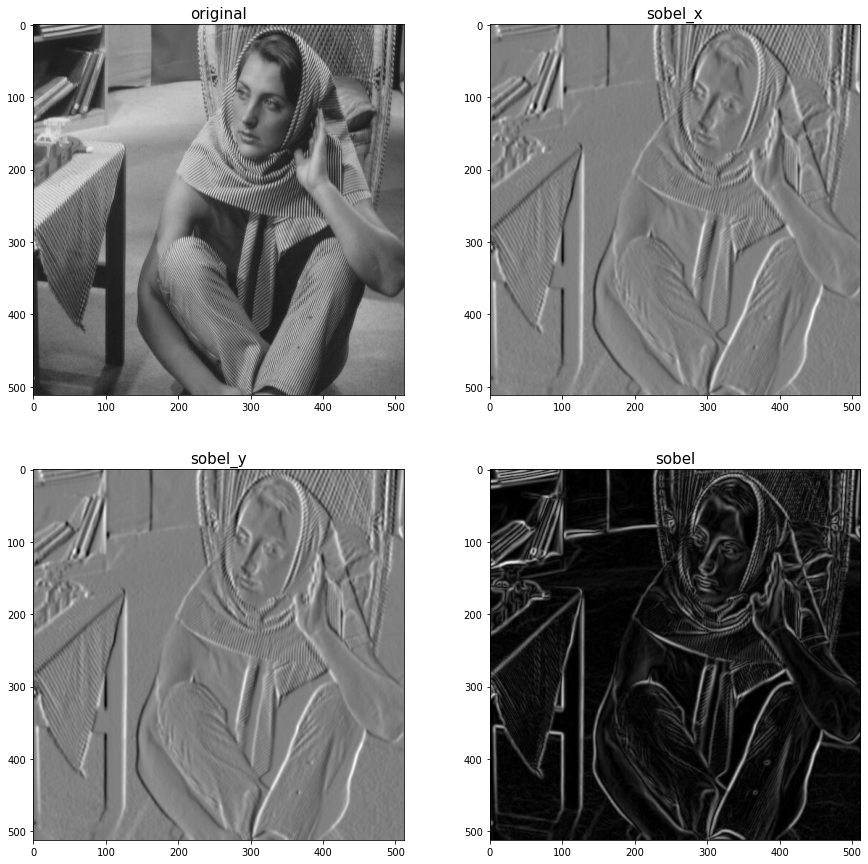

In [6]:
# read the image and convert to float
img = cv2.imread('barbara.jpg').astype(np.float32)
img2 = cv2.imread('barbara.jpg')

# convert to gray
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# blur
blur = cv2.GaussianBlur(gray, (0,0), 1.3, 1.3)

# define Sobel X and Y (correlation) kernels
Kx = np.array([[-1, 0, 1], 
               [-2, 0, 2], 
               [-1, 0, 1]])

Ky = np.array([[-1, -2, -1], 
               [ 0,  0,  0], 
               [ 1,  2,  1]])

# apply correlations and normalize by sum of absolute values of elements
sobelx = ndimage.filters.correlate(blur, Kx)
sobely = ndimage.filters.correlate(blur, Ky)

# optionally normalize to range 0 to 255 for proper display and saving as 8-bit data.
sobelx_norm= exposure.rescale_intensity(sobelx, in_range='image', out_range=(0,255)).clip(0,255).astype(np.uint8)
sobely_norm= exposure.rescale_intensity(sobelx, in_range='image', out_range=(0,255)).clip(0,255).astype(np.uint8)

# add and take square root
sobel_magnitude = np.sqrt(np.square(sobelx) + np.square(sobely))

# normalize to range 0 to 255 and clip negatives
sobel_magnitude = exposure.rescale_intensity(sobel_magnitude, in_range='image', out_range=(0,255)).clip(0,255).astype(np.uint8)

plt.gray()
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(img2)
plt.title('original', size=15)
plt.subplot(222)
plt.imshow(sobelx_norm)
plt.title('sobel_x', size=15)
plt.subplot(223)
plt.imshow(sobely_norm)
plt.title('sobel_y', size=15)
plt.subplot(224)
plt.imshow(sobel_magnitude)
plt.title('sobel', size=15)
plt.show()

sobel_x & sobel_y shows the effect of applying the Sobel filter to calculate the X and Y partial derivatives on the original Barbara image. In these images, we can clearly notice the edges.

The Sobel filter also has the ability to distil an image to its edges as we can see in the sobel picture, the boundaries between the objects in the image. To do this, one can calculate the norm of each pixel's X and Y derivative, that is : 
\begin{align}
\sqrt{\frac{\delta f(x,y)}{\delta x}^2 + \frac{\delta f(x,y)}{\delta y}^2}
\end{align}

## I.3 Average filtering

Average (or mean) filtering is a method of ‘smoothing’ images by reducing the amount of intensity variation between neighbouring pixels.

The average filter works by moving through the image pixel by pixel, replacing each value with the average value of neighbouring pixels, including itself.

We can write it mathematically as :
\begin{align}
\text{new_img}(x,y)= \sum_{j=-1}^1 \sum_{i=-1}^1 1*\text{old_img}(x+i, y+j)
\end{align}

\begin{align}
\text{new_img_norm}(x,y)= \frac{1}{\sum_{j=-1}^1 \sum_{i=-1}^1 1}\sum_{j=-1}^1 \sum_{i=-1}^1 1*\text{old_img}(x+i, y+j)
\end{align}

Here is an example of a 3 by 3 average filtering example applied to the barbara picture :

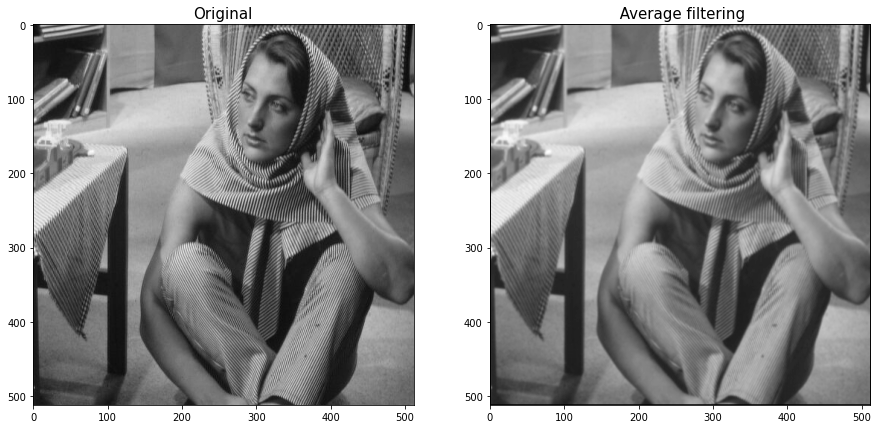

In [7]:
# Read the image
img = cv2.imread('barbara.jpg', 0)

# Obtain number of rows and columns
# of the image
m, n = img.shape

# Develop Averaging filter(3, 3) mask
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

# Convolve the 3X3 mask over the image
img_new = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
		
		img_new[i, j]= temp
		
img_new = img_new.astype(np.uint8)

#Visualisation

plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original', size = 15)
plt.subplot(1,2,2)
plt.imshow(img_new)
plt.title(' Average filtering', size = 15)
plt.show()

In the above example, it is observed that the filtered image is slightly blurred. If we increase the size of the averaging mask, more blurring can be obtained.

## I.4 Gaussian filter

The Gaussian filter is a 2-D convolution operator that is used to 'blur' images and remove detail and noise. In this sense it is similar to the mean filter, but it uses a different kernel that represents the shape of a Gaussian hump. 

We define a gaussian blurring kernel with width $\sigma$ as  :
\begin{align}
h_\sigma(x) = \frac{1}{Z} e^{ -\frac{x_1^2+x_2^2}{2\sigma^2} }
\end{align}

and the mathematical convolution as : 
\begin{align}
f \star h(x) = \sum_y f(y-x) h(x)
\end{align}



In [8]:
def convolution(oldimage, kernel):
    image_h = oldimage.shape[0]
    image_w = oldimage.shape[1]
    
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    if(len(oldimage.shape) == 3):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2),(0,0)), mode='constant', constant_values=0).astype(np.float32)
    elif(len(oldimage.shape) == 2):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)
    
    
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            #sum = 0
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]

    return image_conv[h:h_end,w:w_end]

In [9]:
def GaussianFilter(image, sigma):
    image = cv2.imread(image)
    image = np.asarray(image)
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+m, y+n] = (1/x1)*x2
    
    im_filtered = np.zeros_like(image, dtype=np.float32)
    for c in range(3):
        im_filtered[:, :, c] = convolution(image[:, :, c], gaussian_filter)
    return (im_filtered.astype(np.uint8))

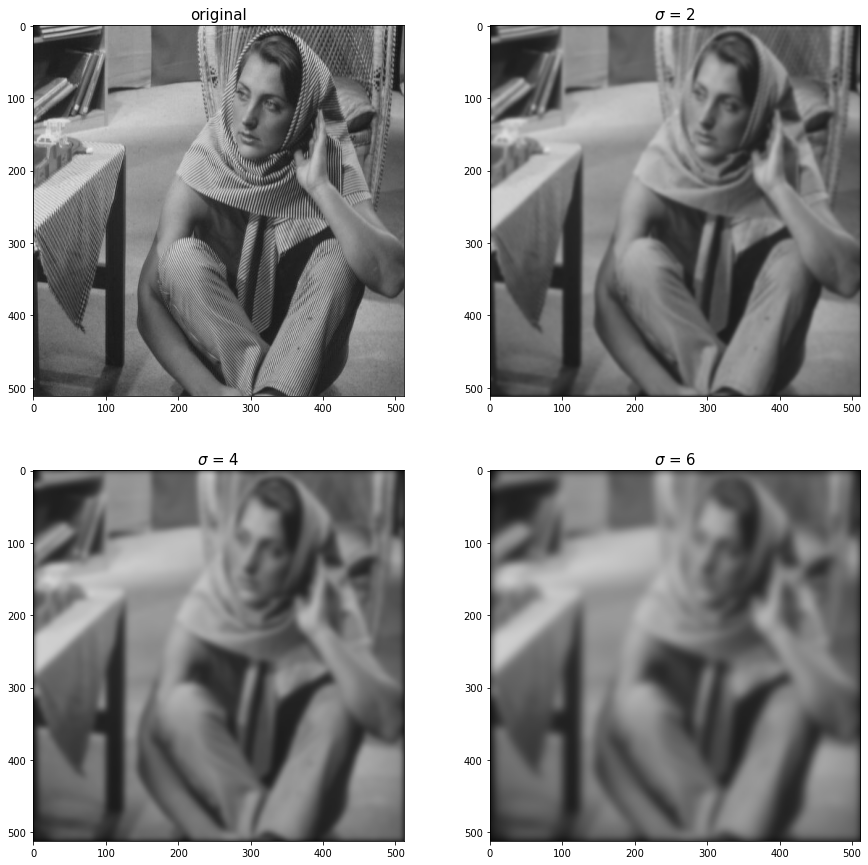

In [10]:
img = cv2.imread('barbara.jpg')
gauss_img2= GaussianFilter('barbara.jpg', 2)
gauss_img4= GaussianFilter('barbara.jpg', 4)
gauss_img6= GaussianFilter('barbara.jpg', 6)
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(img)
plt.title('original', size=15)
plt.subplot(222)
plt.imshow(gauss_img2)
plt.title('$\sigma$ = 2', size=15)
plt.subplot(223)
plt.imshow(gauss_img4)
plt.title('$\sigma$ = 4', size=15)
plt.subplot(224)
plt.imshow(gauss_img6)
plt.title('$\sigma$ = 6', size=15)
plt.show()


We can notice that the blurring from the gaussian filter is linearly proportional with $\sigma$. When $\sigma$ get higher, the blurring is also stronger. 

# II. Audio Filtering

In [25]:
#Importation of libraries
from scipy.io import wavfile
import scipy.signal as sig 
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

# II.A FIR Delay Effect

The FIR can implement with this input-ouput equation
$$ s[t] = e[t] + \alpha * e[t-D] $$
$e[t]$ is the input signal

$s[t]$ is the output signal <!-- spaces --> $\alpha$ is the attenuation factor<!-- spaces -->
$D$ is the delay time <!-- spaces -->

On appelle impulsion un signal discret déni par :
$$
sign(x) = \left\{
    \begin{array}\\
        x_o=1 \\
        x_n=0 & \mbox{if } \ n \ne 0 \\
    \end{array}
\right.
$$
A causal linear system with finite impulse response computes a sequence $y_n$ from from the sequence $x_n$ by the relation : 
$$y_n = \sum_{k=0}^{N-1}h_kx_{n-k}$$
The value of the discrete signal $y_n$ at time n is thus obtained by a linear combination of the N previous values of signal $x_n$.
For an input pulse, the linear system provides the output signal :
$$y_n=h_n$$
 $h_n$ est appelée la réponse impulsionnelle (discrète) du système.

1. **Determine the impulse response of the filter**

In [26]:
#Import of the audio file
FreqEchan, e = wavfile.read('string_1.wav')
# calcul de la  durée du fichier
n= e.size
duree= (1.0*n/FreqEchan)
print(f"***************Audio file Informations *******")
print(f"Data type : {type(e)} \nLength: {n}")
print(f"the duration is {duree} seconds sampled with {FreqEchan} Hz of sampling frequency")

***************Audio file Informations *******
Data type : <class 'numpy.ndarray'> 
Length: 237568
the duration is 5.38702947845805 seconds sampled with 44100 Hz of sampling frequency


In [27]:
#Definition des parametres
alpha = 0.5
D = FreqEchan

 **Implementation basique**

In [36]:
def FIR_delay_filter(e,alpha,D):
  s=[]
  for t in range(1,len(e)):
    if t-D < 0:
      update_value = e[t]
    else:
      update_value = e[t] + (alpha*e[t-D])
    s.append(update_value)
  return s

In [37]:
s = FIR_delay_filter(e,alpha,D)

In [39]:
#Audio Initiale
Audio(e, rate=FreqEchan)

In [40]:
#Audio filtré
Audio(s, rate=D)

2. **Provide the Frequency response of the filter**

In [41]:
def tracerSpectre(data,rate,debut,duree,name):
    start = int(debut*rate)
    stop = int((debut+duree)*rate)
    spectre = np.absolute(np.fft.fft(data[start:stop]))
    spectre = spectre/spectre.max()
    n = spectre.size
    freq = np.zeros(n)
    for k in range(n):
        freq[k] = 1.0/n*rate*k
    plt.vlines(freq,[0],spectre,'b')
    plt.title(name)
    plt.xlabel('f (Hz)')
    plt.ylabel('A')
    plt.axis([0,0.5*rate,0,1])
    plt.grid()

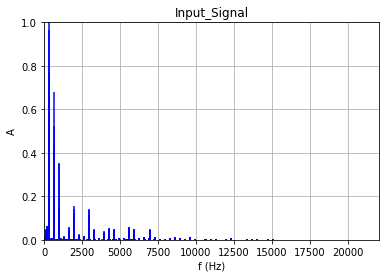

In [42]:
tracerSpectre(e,FreqEchan,0.0,duree,"Input_Signal")

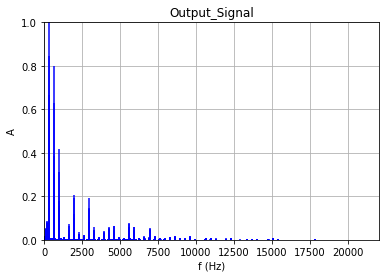

In [43]:
tracerSpectre(np.array(s),FreqEchan,0.0,duree,"Output_Signal")

3. **Implement the delay effect in the time domain**

In [44]:
def plot_temporal(data_wav,freq,n,name):
    periode = 1.0/freq # calcul de la période (l'inverse de la frequence)
    t = np.zeros(n) #  création de'un vecteur de zéros de la taille du fichier
    for k in range(n):
        t[k] = periode*k   # Répartition du vecteur temps 
    plt.figure(figsize=(12,4))
    plt.plot(t,data_wav)
    plt.title(name)
    plt.xlabel("t (s)")
    plt.ylabel("Amplitude") 
    plt.axis([0,5,data_wav.min(),data_wav.max()])
    plt.grid()



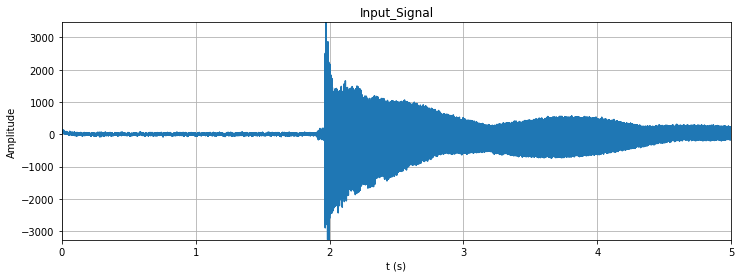

In [45]:
plot_temporal(e,FreqEchan,n,"Input_Signal")

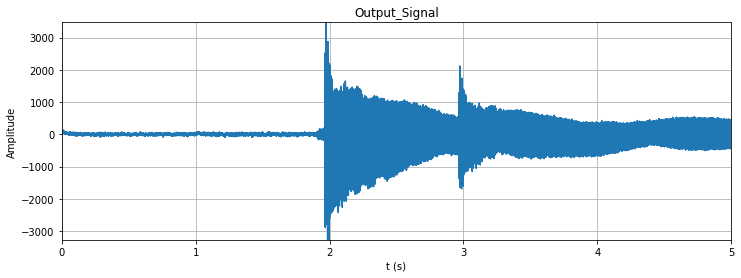

In [47]:
plot_temporal(np.array(s),FreqEchan,np.array(s).size,"Output_Signal")

**Using Scipy library**

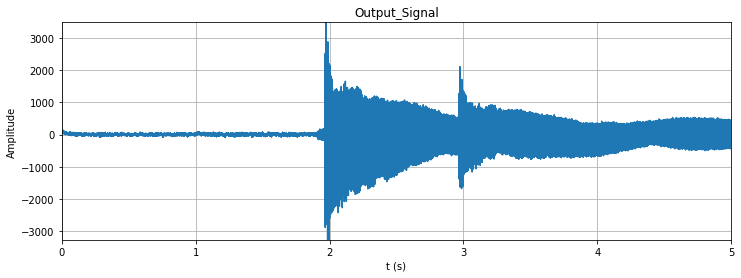

In [48]:
alp= [1]
bet = np.zeros(D)
bet[0] = 1
bet[D-1] = alpha

k = sig.lfilter(bet, alp, e)
plot_temporal(k,FreqEchan,n,"Output_Signal")

In [49]:
#Audio filtré
Audio(k, rate=D)

# II.B **IIR** Delay Effect

The IIR can implement with this input-ouput equation
$$ s[t] = \alpha*e[t] + \beta*s[t-D] $$
$e[t]$ is the input signal

$s[t]$ is the output signal

$\beta$ is the attenuation factor
$\alpha$  is the scaling factor 

$D$ is the delay time

1. **Determine the impulse response of the filter for $D=1$**

In [50]:
beta = 0.75

In [51]:
def IIR_delay_filter(e, alpha,beta,D):
  k = []
  for t in range(1,len(e)):
      if t-D < 0:
          update_value = alpha*e[t]
      else:
          update_value = alpha*e[t] + (beta*k[t-D])
      k.append(update_value)
  return k

In [52]:
L= IIR_delay_filter(e, alpha,beta,D)

In [53]:
Audio(L, rate=D)

2. **Provide the Frequency response of the filter**

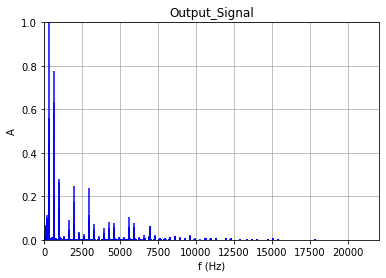

In [54]:
tracerSpectre(np.array(L),FreqEchan,0.0,duree,"Output_Signal")

3. **Implement the delay effect in the time domain**

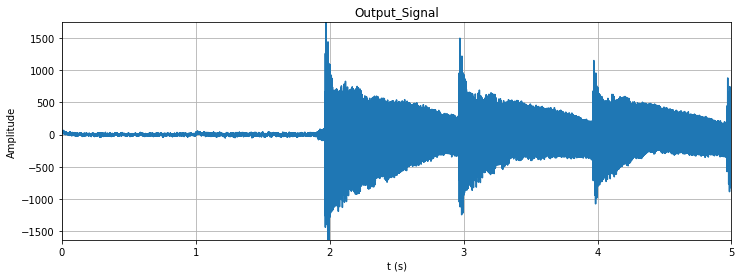

In [55]:
plot_temporal(np.array(L),FreqEchan,np.array(L).size,"Output_Signal")

4. **Is this implementation always stable ?**

Because of the recursivity, this type of filter cannot be said to be truly stable.

5. **Discuss the parameters**

We tried to vary the parameters Aplha and Beta and the Delay to see the stability of the filter.
If the value of beta is higher than 1 we find ourselves with amplitudes of echo higher than the initial sound and it very small we find ourselves with only noise without the initial sound.
The variation of Alpha affects the amplitude of the starting signal and consequently the amplitude of the output, since the output is a sum containing alpha times the input signal.

6. **Compare with the FIR implementation**

Unlike the IIR filter, the response of the FIR filter depends only on the values of the input signal. Therefore, the impulse response of a RIF filter is always of finite duration.

### Scipy.signal librairy

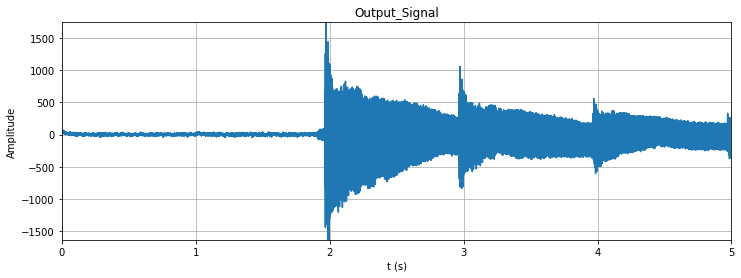

In [56]:

beta = 0.5
beta_1= [0.5]
alpha = np.zeros(D)
alpha[0] = 1
alpha[D-1] = -beta

K = sig.lfilter(beta_1, alpha, e)
plot_temporal(np.array(K),FreqEchan,np.array(K).size,"Output_Signal")


In [57]:
Audio(K, rate=FreqEchan)